# Proyek Analisis Data: [BIKE SHARING DATASET]
- **Nama:** [Zarifa Ayyasy]
- **Email:** [mc180d5x0829@student.devacademy.id]
- **ID Dicoding:** [MC180D5X0829]

## Menentukan Pertanyaan Bisnis

- Musim apa yang paling banyak menjual dan yang paling sedikit penyewa sepeda?
- Pada jam berapa peminjaman sepeda mencapai puncaknya dalam sehari?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
url_day = "https://raw.githubusercontent.com/zarifaayyasy/BikeSharing/refs/heads/main/Data/day.csv"
url_hour = "https://raw.githubusercontent.com/zarifaayyasy/BikeSharing/refs/heads/main/Data/hour.csv"
df_day = pd.read_csv(url_day)
df_hour = pd.read_csv(url_hour)
df_day.head(), df_hour.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

**Insight:**
- Kondisi dapat mempengaruhi jumlah penyewa, Kemungkinan lebih sedikit orang menyewa sepeda pada saat hujan atau cuaca buruk
- Suhu yang lebih nyaman bisa meningkatkan jumlah penyewa

### Assessing Data

In [4]:
# Menampilkan informasi dasar mengenai kedua data
print ("Detail Dataset Harian (day.csv):")
df_day.info()
print("\nDetail Dataset Per Jam (hour.csv):")
df_hour.info()

# Mengecek Keberadaan nilai yang kosong (missing value)
print("\nPemeriksaan Missing Values di day.csv:")
print(df_day.isnull().sum())
print("\nPemeriksaan Missing Values di hour.csv:")
print(df_hour.isnull().sum())
# Mendeteksi apakah terdapat baris data yang terduplikasi
print("\nPemeriksaan Data Duplikat di day.csv:", df_day.duplicated().sum(), "baris duplikat")
print("\nPemeriksaan Data Duplikat di hour.csv:", df_hour.duplicated().sum(), "baris duplikat")

print("\nRingkasan Statistik day.csv:")
display(df_day.describe())

print("\nRingkasan Statistik hour.csv:")
display(df_hour.describe())


Detail Dataset Harian (day.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Detail Dataset Per Jam (hour.csv):
<class 'pandas.core.fram

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



Ringkasan Statistik hour.csv:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat duplikasi data ataupun missing value di kedua dataset


### Cleaning Data

In [5]:
# Menghapus Baris Duplikar
df_day = df_day.drop_duplicates()
df_hour = df_hour.drop_duplicates()

#Menangani Nilai yang hilang (Missing Value), jika ada
df_day = df_day.dropna()
df_hour = df_hour.dropna()

#Mengonversi kolom menjadi tipe data daytime
df_day['dteday']=pd.to_datetime(df_day['dteday'])
df_hour['dteday']=pd.to_datetime(df_hour['dteday'])

# Menghapuskolom "instan karena tidak digunakan"
df_day = df_day.drop(columns='instant', errors='ignore')
df_hour = df_hour.drop(columns='instant', errors='ignore')

# Hasil pembersihan data
print("Pemeriksaan missing values:")
print(df_day.isnull().sum())
print(df_hour.isnull().sum())

print("\nPemeriksaan data duplikat:")
print("Day dataset :", df_day.duplicated().sum(), "duplikat")
print("Hour dataset :", df_hour.duplicated().sum(), "duplikat")

print("/nPemeriksaan data berhasil diselesaikan!")




Pemeriksaan missing values:
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pemeriksaan data duplikat:
Day dataset : 0 duplikat
Hour dataset : 0 duplikat
/nPemeriksaan data berhasil diselesaikan!


**Insight:**
- Tidak terdapat duplikasi data ataupun missing data di kedua dataset
- Berhasil menghapus kolom instan karena tidak dibutuhkan

## Exploratory Data Analysis (EDA)

### Explore ...

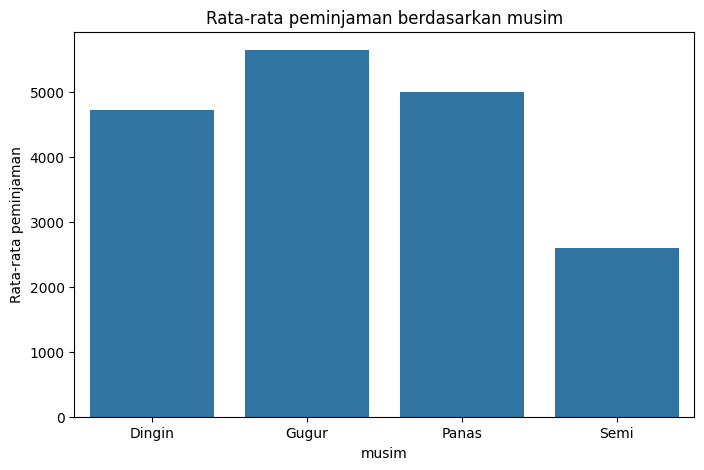

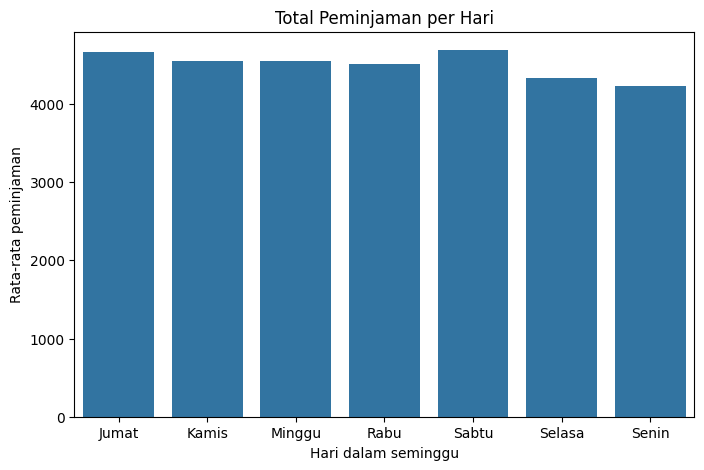

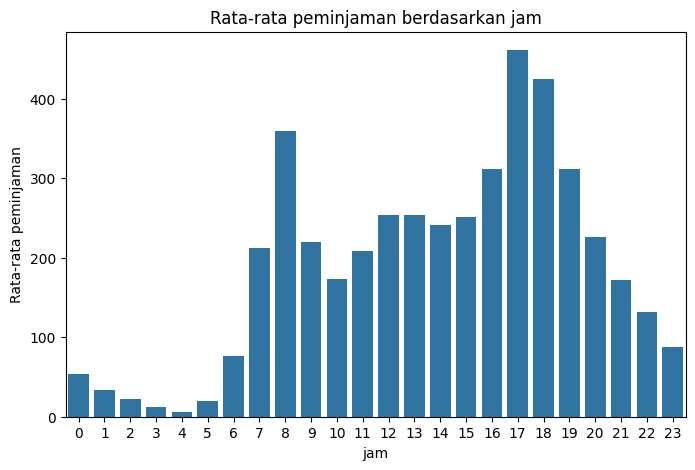

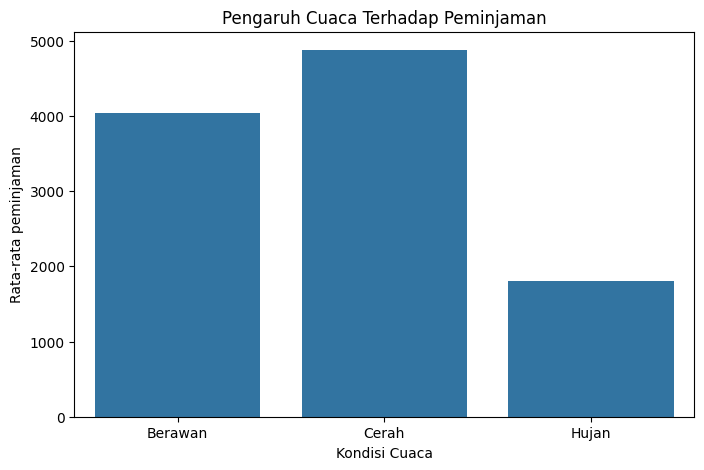

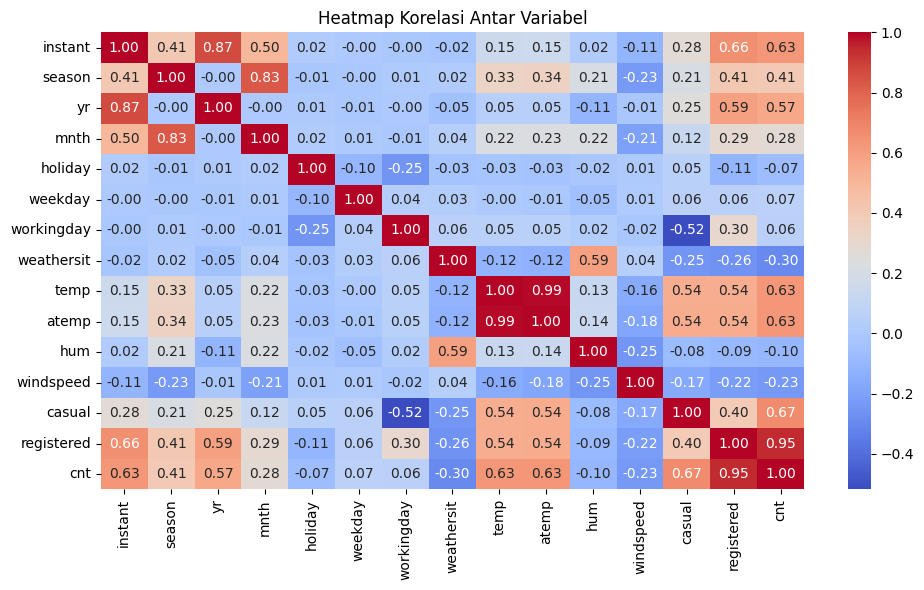

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_day = pd.read_csv(url_day)
df_hour = pd.read_csv(url_hour)

# Konversi kolom tanggal & tambahan nama hari
df_day['dteday']= pd.to_datetime(df_day['dteday'])
df_day['day_of_week'] = df_day['dteday'].dt.day_name()
df_numeric = df_day.select_dtypes(include=['number'])

# Mapping label musim & cuaca
season_labels= {1:"Semi", 2:"Panas", 3:"Gugur", 4:"Dingin"}
weather_labels = {1:"Cerah", 2:"Berawan", 3:"Hujan", 4:"Ekstrem"}
day_labels={0: "Senin", 1: "Selasa", 2: "Rabu", 3: "Kamis", 4: "Jumat", 5: "Sabtu", 6: "Minggu"}

df_day["season"]=df_day["season"].map(season_labels)
df_day["weathersit"]=df_day["weathersit"].map(weather_labels)
df_day["weekday"] = df_day["weekday"].map(day_labels)

# Fungsi untuk agregasi & visualisasi
def aggregate_and_plot(df, group_col, title, xlabel):
  agg_data=df.groupby(group_col)['cnt'].mean().reset_index()
  plt.figure(figsize=(8,5))
  sns.barplot(data=agg_data, x=group_col, y='cnt')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel("Rata-rata peminjaman")
  plt.show

# Visualisasi agregasi
aggregate_and_plot(df_day, 'season', "Rata-rata peminjaman berdasarkan musim", "musim")
aggregate_and_plot(df_day, 'weekday', "Total Peminjaman per Hari", "Hari dalam seminggu")
aggregate_and_plot(df_hour, 'hr', "Rata-rata peminjaman berdasarkan jam", "jam")
aggregate_and_plot(df_day, 'weathersit', "Pengaruh Cuaca Terhadap Peminjaman", "Kondisi Cuaca")

# Visualisasi Heatmap korelasi
plt.figure (figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.tight_layout()
plt.show()









**Insight:**
- Jumlah peminjaman sepeda cendering meningkat seiring berjalannya waktu, terspata pola musiman dalam jumlah peminjaman sepeda
- season 2 memiliki peminjaman tertinggi, dan season 4 memiliki peminjaman terendah
- Akhir pekan cenderung memiliki sedikit perubahan dalam peminjaman
- Cuaca cerah dan berawa memiliki jumlah peminjaman tertinggi
Suhu memiliki korelasi positif dengan jumlah peminnjaman sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim apa yang paling banyak dan paling sedikit penyewa sepeda?

<ipython-input-27-418dcbf83931>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=seasonal_rentals, x="season", y="cnt", order=season_order, palette=bar_colors)


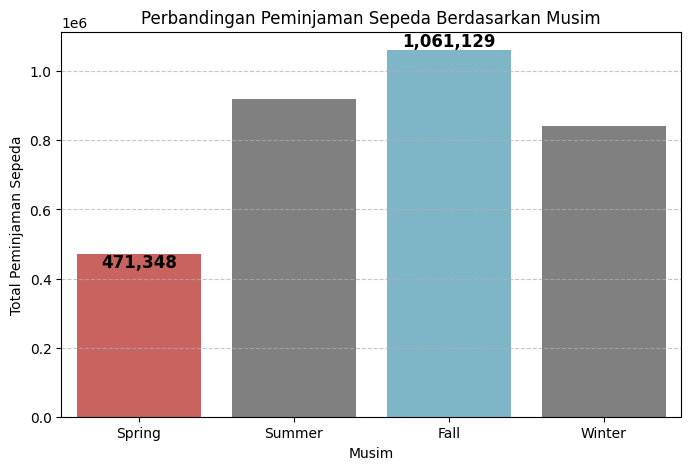

Musim dengan jumlah penyewa tertinggi: Fall (1,061,129 peminjaman)
Musim dengan jumlah penyewa terendah: Spring (471,348 peminjaman)


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengunduh dataset dan membacanya sebagai DataFrame
df = pd.read_csv(url_day, parse_dates=["dteday"])

# Mengubah kode musim menjadi label yang lebih mudah dipahami
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df["season"] = df["season"].map(season_labels)

# Menghitung total jumlah peminjaman sepeda untuk setiap musim
seasonal_rentals = df.groupby("season")["cnt"].sum().reset_index()

# Menentukan musim dengan penyewa terbanyak dan paling sedikit
most_rentals = seasonal_rentals.loc[seasonal_rentals["cnt"].idxmax()]
least_rentals = seasonal_rentals.loc[seasonal_rentals["cnt"].idxmin()]

# Menyusun urutan tampilan musim
season_order = ["Spring", "Summer", "Fall", "Winter"]

# Menentukan posisi x (indeks) untuk penambahan teks
x_pos_most = season_order.index(most_rentals["season"])
x_pos_least = season_order.index(least_rentals["season"])

# Mengatur warna batang dalam grafik
# Musim dengan penyewaan tertinggi diberi warna biru, terendah warna merah, lainnya abu-abu
bar_colors = [
    "#72BCD4" if season == most_rentals["season"]
    else "#D9534F" if season == least_rentals["season"]
    else "grey"
    for season in season_order
]

# Membuat visualisasi dalam bentuk bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=seasonal_rentals, x="season", y="cnt", order=season_order, palette=bar_colors)

# Menambahkan teks jumlah peminjaman pada musim dengan penyewaan tertinggi dan terendah
ax.text(x_pos_most, most_rentals["cnt"], f"{most_rentals['cnt']:,}",
        ha='center', va='bottom', fontsize=12, fontweight='bold', color="black")

ax.text(x_pos_least, least_rentals["cnt"], f"{least_rentals['cnt']:,}",
        ha='center', va='top', fontsize=12, fontweight='bold', color="black")

# Memberikan judul dan label sumbu
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Perbandingan Peminjaman Sepeda Berdasarkan Musim")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

# Menampilkan hasil musim dengan penyewa terbanyak dan paling sedikit dalam format teks
print(f"Musim dengan jumlah penyewa tertinggi: {most_rentals['season']} ({most_rentals['cnt']:,} peminjaman)")
print(f"Musim dengan jumlah penyewa terendah: {least_rentals['season']} ({least_rentals['cnt']:,} peminjaman)")


### Pertanyaan 2: Pada jam berapa peminjaman sepeda mencapai puncaknya dalam sehari?

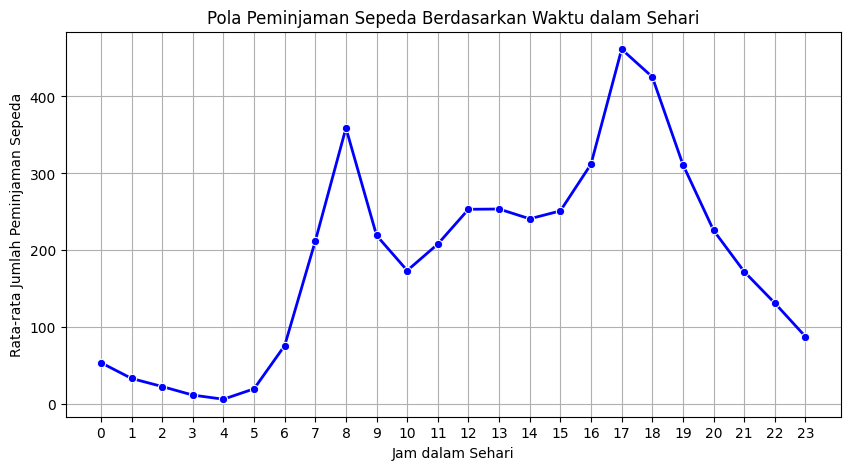

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengunduh dataset dari sumber yang benar (hour.csv, bukan day.csv)
data = pd.read_csv(url_data)

# Pastikan kolom "hr" ada dalam dataset
if "hr" in data.columns:
    # Menghitung rata-rata jumlah peminjaman sepeda berdasarkan jam
    rata_peminjaman_per_jam = data.groupby("hr")["cnt"].mean().reset_index()

    # Membuat visualisasi tren peminjaman sepeda berdasarkan jam
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=rata_peminjaman_per_jam, x="hr", y="cnt", marker="o", color="b", linewidth=2)

    # Menyesuaikan tampilan sumbu x agar menampilkan semua jam dari 0 hingga 23
    plt.xticks(range(0, 24))
    plt.xlabel("Jam dalam Sehari")
    plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
    plt.title("Pola Peminjaman Sepeda Berdasarkan Waktu dalam Sehari")
    plt.grid(True)

    # Menampilkan grafik
    plt.show()
else:
    print("Kolom 'hr' tidak ditemukan dalam dataset. Pastikan menggunakan dataset 'hour.csv', bukan 'day.csv'.")

**Insight:**
- Musim dengan peminjaman paling tinggi adalah pada musim fall dan paling sedikit adalah musim spring
- Puncak peminjaman terjadi di pagi (7-9 AM) dan sore (5-7 PM)

## Analisis Lanjutan (Opsional)

<ipython-input-30-d09ed0be36ff>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_rentals, x="season", y="cnt", order=season_order, palette=bar_colors)


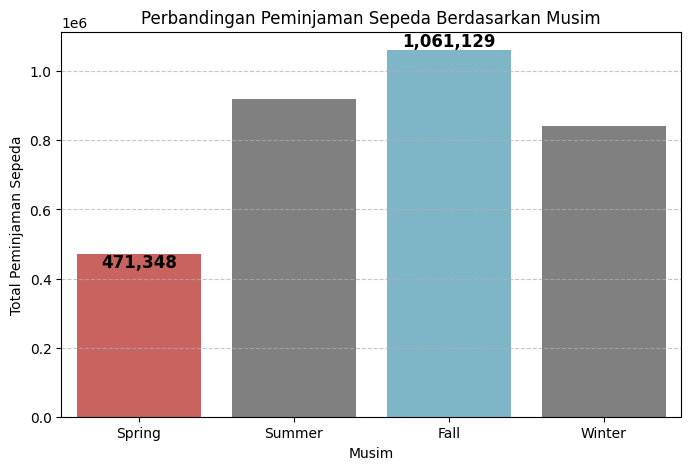

Musim dengan jumlah penyewa tertinggi: Fall (1,061,129 peminjaman)
Musim dengan jumlah penyewa terendah: Spring (471,348 peminjaman)


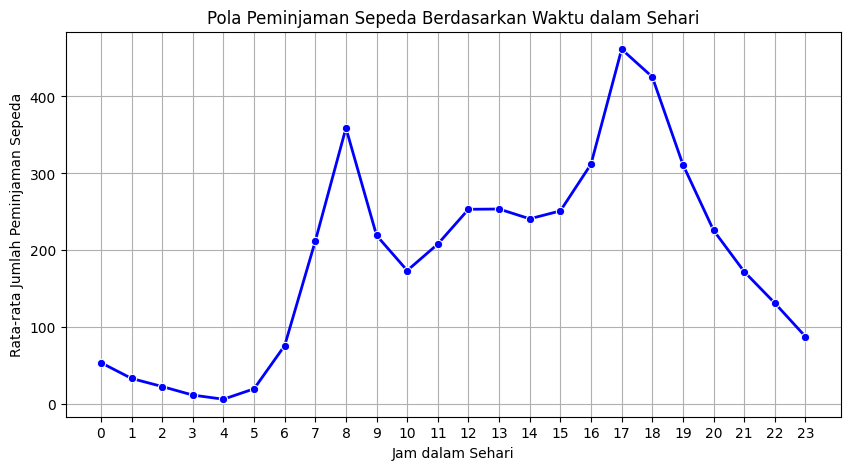

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========================== BAGIAN 1: ANALISIS BERDASARKAN MUSIM ==========================

# Mengunduh dataset harian
df_day = pd.read_csv(url_day, parse_dates=["dteday"])  # Perbaikan typo pada kolom dteday

# Mengonversi kode musim menjadi label yang lebih mudah dipahami
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df_day["season"] = df_day["season"].map(season_labels)

# Menghitung total jumlah peminjaman sepeda untuk setiap musim
seasonal_rentals = df_day.groupby("season")["cnt"].sum().reset_index()

# Menentukan musim dengan penyewa terbanyak dan paling sedikit
most_rentals = seasonal_rentals.loc[seasonal_rentals["cnt"].idxmax()]
least_rentals = seasonal_rentals.loc[seasonal_rentals["cnt"].idxmin()]

# Menyusun urutan tampilan musim
season_order = ["Spring", "Summer", "Fall", "Winter"]

# Mengatur warna batang dalam grafik
bar_colors = ["gray" if season not in [most_rentals["season"], least_rentals["season"]]
              else "#72BCD4" if season == most_rentals["season"]
              else "#D9534F" for season in season_order]

# Membuat visualisasi dalam bentuk bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_rentals, x="season", y="cnt", order=season_order, palette=bar_colors)

# Menambahkan teks jumlah peminjaman pada musim terbaik & terburuk
plt.text(season_order.index(most_rentals["season"]), most_rentals["cnt"], f"{most_rentals['cnt']:,}",
         ha='center', va='bottom', fontsize=12, fontweight='bold', color="black")

plt.text(season_order.index(least_rentals["season"]), least_rentals["cnt"], f"{least_rentals['cnt']:,}",
         ha='center', va='top', fontsize=12, fontweight='bold', color="black")

# Memberikan judul dan label sumbu
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Perbandingan Peminjaman Sepeda Berdasarkan Musim")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()

# Menampilkan hasil dalam format teks
print(f"Musim dengan jumlah penyewa tertinggi: {most_rentals['season']} ({most_rentals['cnt']:,} peminjaman)")
print(f"Musim dengan jumlah penyewa terendah: {least_rentals['season']} ({least_rentals['cnt']:,} peminjaman)")

# ========================== BAGIAN 2: ANALISIS BERDASARKAN JAM ==========================

# Mengunduh dataset per jam
df_hour = pd.read_csv(url_hour)

# Pastikan kolom "hr" ada dalam dataset
if "hr" in df_hour.columns:
    # Menghitung rata-rata jumlah peminjaman sepeda berdasarkan jam
    rata_peminjaman_per_jam = df_hour.groupby("hr")["cnt"].mean().reset_index()

    # Membuat visualisasi tren peminjaman sepeda berdasarkan jam
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=rata_peminjaman_per_jam, x="hr", y="cnt", marker="o", color="b", linewidth=2)

    # Menyesuaikan tampilan sumbu x agar menampilkan semua jam dari 0 hingga 23
    plt.xticks(range(0, 24))
    plt.xlabel("Jam dalam Sehari")
    plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
    plt.title("Pola Peminjaman Sepeda Berdasarkan Waktu dalam Sehari")
    plt.grid(True)

    # Menampilkan grafik
    plt.show()
else:
    print("Kolom 'hr' tidak ditemukan dalam dataset. Pastikan menggunakan dataset 'hour.csv', bukan 'day.csv'.")


## Conclusion

- Conclution pertanyaan 1
 Jumlah peminjaman dengan penyewa tertinggi adalah pada musim panas(summer) dan penyewa terendah adalah pada msuim dingin (winter). Grafik bar menunjukkan perbedaan yang jelas karena antara penjumlaj ppeminjaman pad tiap musim, warna khusus diberikan untuk musim dengan jumlah peminjaman tertinggi (biru) dan terendah (merah) untuk memperjelas perbedaan. Teks angka pada grafik menampilkan jumlah peminjaman spesifik untuk setiap musim
- Conclution pertanyaan 2
Puncak peminjaman terjadi di pagi hari (07.00-09.00) dan sore (15.00-17.00) bahwa peminjaman digunakakn untuk beraktivitas (kerja/sekolah)